In [6]:
import tensorflow as tf

In [7]:
tf.__version__

'2.5.0'

# 신경망을 위한 데이터 표현

넘파이에서는 float32나 float64타입의 숫자가 스칼라 텐서

In [12]:
[1,2,3,4,5] + [3,4,5,6,7]

[1, 2, 3, 4, 5, 3, 4, 5, 6, 7]

In [8]:
import numpy as np

In [13]:
np.array([1,2,3,4,5]) + np.array([3,4,5,6,7])

array([ 4,  6,  8, 10, 12])

In [14]:
x = np.array(12)

In [15]:
x

array(12)

In [16]:
x.ndim

0

In [20]:
x = np.array([12])
# 제일 앞에 있는 괄호가 하나가 있으면 1차원..

In [19]:
x.ndim

1

In [21]:
x = np.array([[12]])


In [22]:
x.ndim

2

In [23]:
x = np.array([[12],[0]])

In [24]:
x.ndim

2

In [25]:
x = np.array([[[12,13,14],
             [15,16,17],
             [18,19,20]]])
# 끝에 괄호 개수만 보면 차원 알수있다

In [26]:
x.ndim

2

In [27]:
x = np.array([
            [[12,13,14],
             [15,16,17],
             [18,19,20]],
             [[12,13,14],
             [15,16,17],
             [18,19,20]],
             [[12,13,14],
             [15,16,17],
             [18,19,20]]
])
# 끝에 괄호 개수만 보면 차원 알수있다

In [28]:
x.ndim

3

- Rank 0 Tensor : scalar
- Rank 1 Tensor : vector
- Rank 2 Tensor : matrix
- Rank 3 Tensor 

In [29]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist

In [31]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [33]:
train_images.ndim

3

In [34]:
train_images.dtype

dtype('uint8')

In [35]:
train_images.shape

(60000, 28, 28)

In [37]:
digit = train_images[4]

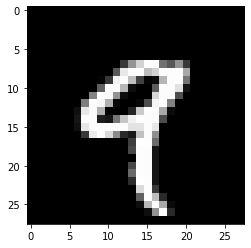

In [38]:
import matplotlib.pyplot as plt
plt.imshow(digit, cmap = 'gray')
plt.show()

In [39]:
digit

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [41]:
my_slice = train_images[11:101]
print(my_slice.shape)

(90, 28, 28)


In [44]:
my_slice = train_images[:, 14:, 14:]
print(my_slice.shape)

(60000, 14, 14)


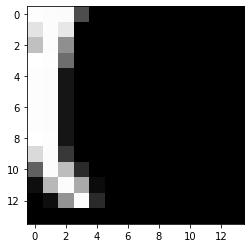

In [45]:
plt.imshow(my_slice[4], cmap='gray')
plt.show()

(60000, 21, 21)


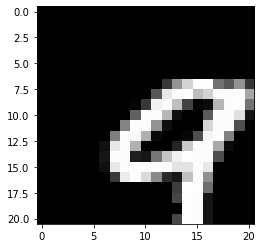

In [46]:
my_slice = train_images[:, :-7, :-7]
print(my_slice.shape)
plt.imshow(my_slice[4], cmap='gray')
plt.show()

(60000, 14, 21)


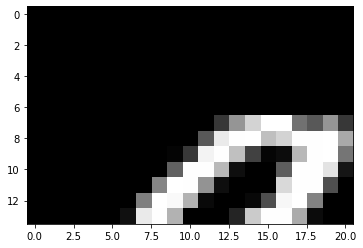

In [47]:
my_slice = train_images[:, :-14, :-7]
print(my_slice.shape)
plt.imshow(my_slice[4], cmap='gray')
plt.show()

배치 데이터

In [48]:
batch = train_images[:128]

In [49]:
batch = train_images[128:256]

n 번째 배치

In [50]:
n = 3
batch = train_images[128*n:128*(n+1)]

- **2차원: 벡터 데이터**
(samples, features)

- **3차원: 시계열 데이터, sequence data**
(samples, timesteps, features)

- **4차원: 영상**
(samples, height, width, channels),(samples, channels, height, width)  

- **5차원: 동영상**
(samples, frames ,height, width, channels)

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
import numpy as np

In [52]:
공부시간 = np.array([1,2,3,4,5,6])
점수 = np.array([10,21,30,40,51,60])

In [58]:
model = Sequential()
model.add(Dense(1, input_dim=1, activation='linear'))

In [59]:
sgd = optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])

In [60]:
model.fit(공부시간, 점수, epochs=100, batch_size = 1, shuffle=False)

Epoch 1/100
6/6 [==============================] - 1s 3ms/step - loss: 349.2967 - accuracy: 0.0000e+00
Epoch 2/100
6/6 [==============================] - 0s 2ms/step - loss: 1.7507 - accuracy: 0.0000e+00
Epoch 3/100
6/6 [==============================] - 0s 4ms/step - loss: 1.0122 - accuracy: 0.0000e+00
Epoch 4/100
6/6 [==============================] - 0s 3ms/step - loss: 1.0053 - accuracy: 0.0000e+00
Epoch 5/100
6/6 [==============================] - 0s 2ms/step - loss: 0.9769 - accuracy: 0.0000e+00
Epoch 6/100
6/6 [==============================] - 0s 2ms/step - loss: 0.9484 - accuracy: 0.0000e+00
Epoch 7/100
6/6 [==============================] - 0s 3ms/step - loss: 0.9210 - accuracy: 0.0000e+00
Epoch 8/100
6/6 [==============================] - 0s 3ms/step - loss: 0.8949 - accuracy: 0.0000e+00
Epoch 9/100
6/6 [==============================] - 0s 5ms/step - loss: 0.8700 - accuracy: 0.0000e+00
Epoch 10/100
6/6 [==============================] - 0s 3ms/step - loss: 0.8461 - accuracy

6/6 [==============================] - 0s 2ms/step - loss: 0.3550 - accuracy: 0.0000e+00
Epoch 81/100
6/6 [==============================] - 0s 2ms/step - loss: 0.3541 - accuracy: 0.0000e+00
Epoch 82/100
6/6 [==============================] - 0s 5ms/step - loss: 0.3531 - accuracy: 0.0000e+00
Epoch 83/100
6/6 [==============================] - 0s 3ms/step - loss: 0.3522 - accuracy: 0.0000e+00
Epoch 84/100
6/6 [==============================] - 0s 2ms/step - loss: 0.3513 - accuracy: 0.0000e+00
Epoch 85/100
6/6 [==============================] - 0s 2ms/step - loss: 0.3505 - accuracy: 0.0000e+00
Epoch 86/100
6/6 [==============================] - 0s 2ms/step - loss: 0.3496 - accuracy: 0.0000e+00
Epoch 87/100
6/6 [==============================] - 0s 3ms/step - loss: 0.3489 - accuracy: 0.0000e+00
Epoch 88/100
6/6 [==============================] - 0s 2ms/step - loss: 0.3481 - accuracy: 0.0000e+00
Epoch 89/100
6/6 [==============================] - 0s 2ms/step - loss: 0.3474 - accuracy: 0.00

In [61]:
print('예측결과: ', model.predict([7]))
print('파라미터수 : ', model.count_params())

예측결과:  [[70.051506]]
파라미터수 :  2


n = 6일때

In [ ]:
x1= np.array([1,2,3,4,5,6])
x2
x3
x4
x5
x6
y = np.array([10,21,30,40,51,60])

In [62]:
model = Sequential()
model.add(Dense(1, input_dim=6, activation='linear'))

In [63]:
sgd = optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])

In [65]:
 model.count_params()

7

# 보스턴 주택 가격 예제

In [66]:
from tensorflow.keras.datasets import boston_housing

In [73]:
boston_housing.load_data()

((array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
          3.96900e+02, 1.87200e+01],
         [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
          3.95380e+02, 3.11000e+00],
         [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
          3.75520e+02, 3.26000e+00],
         ...,
         [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
          3.62250e+02, 7.83000e+00],
         [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
          2.61950e+02, 1.57900e+01],
         [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
          3.76700e+02, 4.38000e+00]]),
  array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
         17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
         32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
         23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
         12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.

In [77]:
(train_data,train_targets),(test_data,test_targets) = boston_housing.load_data()

In [78]:
print('train_targets.min', train_targets.min())
print('train_targets.max', train_targets.max())

train_targets.min 5.0
train_targets.max 50.0


In [79]:
model = Sequential()
model.add(Dense(1, input_dim=13, activation='linear'))

In [80]:
sgd = optimizers.SGD(learning_rate=0.01)
model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])

In [85]:
mean = train_data.mean(axis = 0)
train_data -= mean

std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [86]:
train_data

array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
         0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
         0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
         0.22061726, -1.30850006],
       ...,
       [-0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
         0.07943894, -0.67776904],
       [-0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
        -0.98764362,  0.42083466],
       [-0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
         0.23317118, -1.15392266]])

In [87]:
train_data.mean()

2.602301889250862e-15

In [88]:
train_data.std()

0.9999999999999994

In [81]:
 model.count_params()

14

In [89]:
from tensorflow.keras import backend as k
k.clear_session()

In [90]:
model.fit(train_data, train_targets, epochs=100, batch_size = 1, shuffle=False)

Epoch 1/100
404/404 [==============================] - 1s 2ms/step - loss: 506.6548 - accuracy: 0.0000e+00: 0s - loss: 512.0185 - accuracy: 0.0000
Epoch 2/100
404/404 [==============================] - 1s 2ms/step - loss: 484.6001 - accuracy: 0.0000e+00
Epoch 3/100
404/404 [==============================] - 1s 2ms/step - loss: 463.9042 - accuracy: 0.0000e+00
Epoch 4/100
404/404 [==============================] - 1s 2ms/step - loss: 444.4152 - accuracy: 0.0000e+00
Epoch 5/100
404/404 [==============================] - 1s 2ms/step - loss: 425.9800 - accuracy: 0.0000e+00
Epoch 6/100
404/404 [==============================] - 1s 1ms/step - loss: 408.4711 - accuracy: 0.0000e+00
Epoch 7/100
404/404 [==============================] - 1s 1ms/step - loss: 391.7836 - accuracy: 0.0000e+00
Epoch 8/100
404/404 [==============================] - 1s 2ms/step - loss: 375.8303 - accuracy: 0.0000e+00
Epoch 9/100
404/404 [==============================] - 1s 2ms/step - loss: 360.5399 - accuracy: 0.0000e+

404/404 [==============================] - 1s 1ms/step - loss: 31.4921 - accuracy: 0.0000e+00
Epoch 75/100
404/404 [==============================] - 1s 1ms/step - loss: 31.1679 - accuracy: 0.0000e+00
Epoch 76/100
404/404 [==============================] - 1s 2ms/step - loss: 30.8613 - accuracy: 0.0000e+00
Epoch 77/100
404/404 [==============================] - 1s 2ms/step - loss: 30.5710 - accuracy: 0.0000e+00
Epoch 78/100
404/404 [==============================] - ETA: 0s - loss: 30.1794 - accuracy: 0.0000e+0 - 1s 1ms/step - loss: 30.2959 - accuracy: 0.0000e+00
Epoch 79/100
404/404 [==============================] - 1s 1ms/step - loss: 30.0349 - accuracy: 0.0000e+00
Epoch 80/100
404/404 [==============================] - 1s 1ms/step - loss: 29.7871 - accuracy: 0.0000e+00
Epoch 81/100
404/404 [==============================] - 1s 1ms/step - loss: 29.5516 - accuracy: 0.0000e+00
Epoch 82/100
404/404 [==============================] - 1s 2ms/step - loss: 29.3276 - accuracy: 0.0000e+00
Ep

In [94]:
model.predict(test_data)

array([[ 7.9551105],
       [20.9462   ],
       [21.765041 ],
       [28.67677  ],
       [24.86043  ],
       [21.864023 ],
       [29.445965 ],
       [24.189325 ],
       [18.048115 ],
       [22.248457 ],
       [19.61221  ],
       [19.096956 ],
       [17.985584 ],
       [35.989048 ],
       [16.140892 ],
       [20.739565 ],
       [25.038057 ],
       [23.563654 ],
       [19.30146  ],
       [22.256563 ],
       [ 9.28045  ],
       [13.057875 ],
       [21.697233 ],
       [13.739347 ],
       [21.195911 ],
       [22.258532 ],
       [29.257002 ],
       [24.958378 ],
       [12.3306   ],
       [21.532213 ],
       [23.988646 ],
       [16.675312 ],
       [31.221638 ],
       [23.733433 ],
       [16.82684  ],
       [ 3.946661 ],
       [17.173906 ],
       [21.157522 ],
       [19.218122 ],
       [27.01812  ],
       [25.226852 ],
       [28.150946 ],
       [18.224781 ],
       [35.699707 ],
       [29.361515 ],
       [23.655252 ],
       [28.489576 ],
       [18.74